# Python for PHY 117 -- graphing data and curve-fitting

How to do some curve-fitting things that we've done in PHY 117 recently, but in python instead of logger pro.  

Suppose the students have done a lab in which they measure the kinetic friction force $F_k$ on a block as a function of the mass $m$ of the block, and saved their data in a file "friction_data.txt".  They need to graph the data and then see whether / how well it is fit by the model

$$ F_k = \mu_k m g.$$

In [1]:
# Import some packages that we'll need to use:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import FloatSlider

%matplotlib inline

Now let's import the data from the file and put it into a few appropriately-named arrays so it can be graphed.

In [2]:
data = np.loadtxt("friction_data.txt", skiprows=1)  #skip the first row, which contains column headers

print(data)  # print out the array just so we can make sure it looks right

[[  1.00000000e+02   4.53800000e-01   7.30000000e-02]
 [  2.00000000e+02   8.73200000e-01   5.50000000e-02]
 [  2.50000000e+02   9.23900000e-01   8.20000000e-02]
 [  3.00000000e+02   1.32580000e+00   7.30000000e-02]
 [  4.00000000e+02   1.87340000e+00   1.23000000e-01]
 [  5.00000000e+02   2.33270000e+00   1.35000000e-01]
 [  7.00000000e+02   3.12930000e+00   1.82000000e-01]
 [  8.00000000e+02   3.72340000e+00   2.11000000e-01]]


It seems to look good: first column is mass values (in grams), second column is F_k_best values, and third column is the uncertainties, dF_k. 

For making graphs, etc., it will be a little simpler to create three separate 1-d arrays, each of which contains one of the data columns.  So let's do that.  

In [4]:
masses_data = data[:,0]  # create a 1-d array with the m values
Fk_data = data[:,1]      # create a 1-d array with the Fk_best values
dFk_data = data[:,2]     # create a 1-d array with the uncertainties on Fk

Now let's make a graph of the data just to see what it looks like before we get into the curve-fitting stuff...

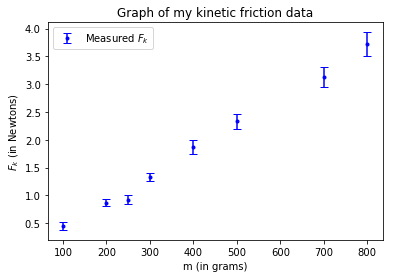

In [19]:
plt.errorbar(masses_data,Fk_data,yerr=dFk_data,xerr=None,fmt='b.',capsize=4,label="Measured $F_k$")
    # create a plot with errorbars with "masses_data" along the x-axis, "Fk_data" along the 
    # y-axis, no x-error bars, blue dots to mark the points, ...
plt.title("Graph of my kinetic friction data")  # put a title above the plot
plt.xlabel("m (in grams)")     # label for the x-axis
plt.ylabel("$F_k$ (in Newtons)")   # label for the y-axis
plt.legend();   # include a legend

Now let's create a function that captures the friction model

In [20]:
g = 9.8

def fric_model(muk, m):
    """
    Returns the predicted friction force (in Newtons), F_k = mu_k * m * g,
    for an object sliding across level ground with no other vertical forces.
    Note that the mass "m" is input in grams, and the returned F_k value is in Newtons.
    """
    return muk*m*g/1000   # divide by 1000 to convert m-in-grams to m-in-kg

We can make some arrays of $m$-values and associated $F_k$ values as predicted by the model, and graph both.  Suppose, to begin with, we think $mu_k = 0.34$ and we want to test that.  

In [21]:
masses = np.linspace(0,800,101)  # create an array of 101 m-values evenly spaced b/w 0 and 800 grams

Fk_model = fric_model(0.34,masses)  # Note we pass the function an array of mass values and 
                                    # so Fk_model will be the array of associated F_k values


Let's make a plot of the model and our data on the same graph...

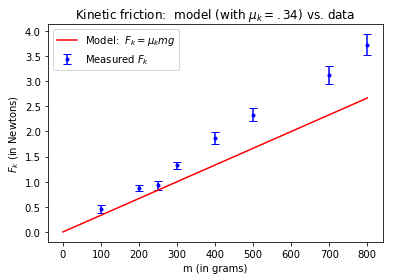

In [23]:

plt.errorbar(masses_data,Fk_data,yerr=dFk_data,xerr=None,fmt='b.',capsize=4,label="Measured $F_k$")
    # same as before
    
plt.plot(masses,Fk_model,'r-',label="Model:  $F_k = \mu_k m g$")  # also plot the model curve, as a red line

plt.title("Kinetic friction:  model (with $\mu_k = .34$) vs. data")  
plt.xlabel("m (in grams)")     
plt.ylabel("$F_k$ (in Newtons)")   
plt.legend(); 


So it doesn't look like the friction coefficient is $\mu_k = .34$.  

Let's try to find a more accurate value by curve-fitting.  This can of course be done "automatically", but I like the following way of doing it "manually", so the student can see the effect (in real time in the graph)  of changing parameters in the formula, and we can watch what happens to the "goodness of fit" measure G as the fit parameter (here $\mu_k$) is adjusted. 

In [24]:
# First, create a function which takes the parameter value(s) 
# and makes a graph like the one above.  We need this to pass to the
# interactive widget thing below...

def make_graph(muk):
    
    # First repopulate the Fk_model array with values for the new muk value
    
    Fk_model = fric_model(muk,masses)  
    
    # Now calculate the goodness of fit parameter
    
    nparam = 1    # I've just hard coded this assuming there is only one fit parameter...
    total_squared_tprime = 0.0
    for i in range(masses_data.size):
        total_squared_tprime += (Fk_data[i] - fric_model(muk,masses_data[i]))**2/dFk_data[i]**2
    goodness = np.sqrt(total_squared_tprime/(masses_data.size-nparam))

    # And now make the graph
    
    plt.figure(figsize=(10,7))  # make the graph a little bigger
    plt.errorbar(masses_data,Fk_data,yerr=dFk_data,xerr=None,fmt='b.',capsize=4,label="Measured $F_k$")
    plt.plot(masses,Fk_model,'r-',label="Model:  $F_k = \mu_k m g$")  
    plt.title("Kinetic friction:  model vs. data")  
    plt.xlabel("m (in grams)")     
    plt.ylabel("$F_k$ (in Newtons)")   
    plt.legend()   
    plt.axis([0,900,0,4.0])  # fix the ranges plotted on both axes so it doesn't autorescale when we adjust muk
    
    text = "$\mu_k$ = {:.3f} \n G = {:.3f}".format(muk,goodness)   # text for the text box
    
    plt.text(600,1.0,text,fontsize=12,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    # this puts a text box in the lower right corner displaying the value of mu_k and G

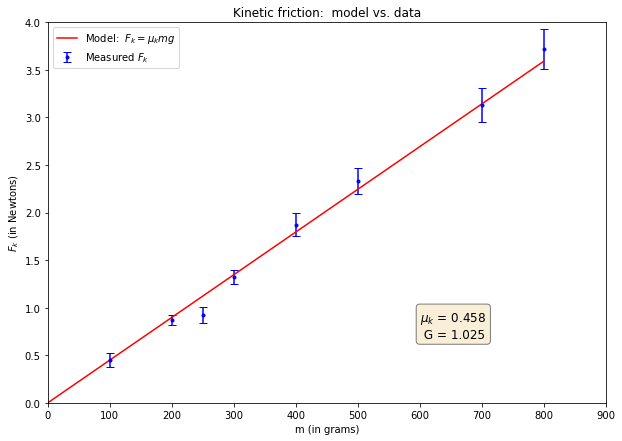

In [25]:
# Now create an interactive widget so we can fiddle with the value of mu_k and
# watch what it does to the graph

interact(make_graph, muk=FloatSlider(min=0.4, max=0.6, step=.002, value = 0.5, readout_format='.3f'));

So the student can fiddle with the value of $\mu_k$ using the slider bar and try to find a value -- or range of values -- that makes the model fit the data well, as quantified by the "goodness of fit" parameter G.  Note that I find G is minimized for $\mu_k = .454$ but G is less than 1.5 in the range $.42 < \mu_k .49$, so probably we can just say that $mu_k$ is somewhere in that range, i.e., $$\mu_k = .45 \pm .04$$ or so.  